<a href="https://colab.research.google.com/github/rayoo22/DEEP-LEARNING-PROJECT/blob/main/cnn_dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras import layers
from keras import models
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


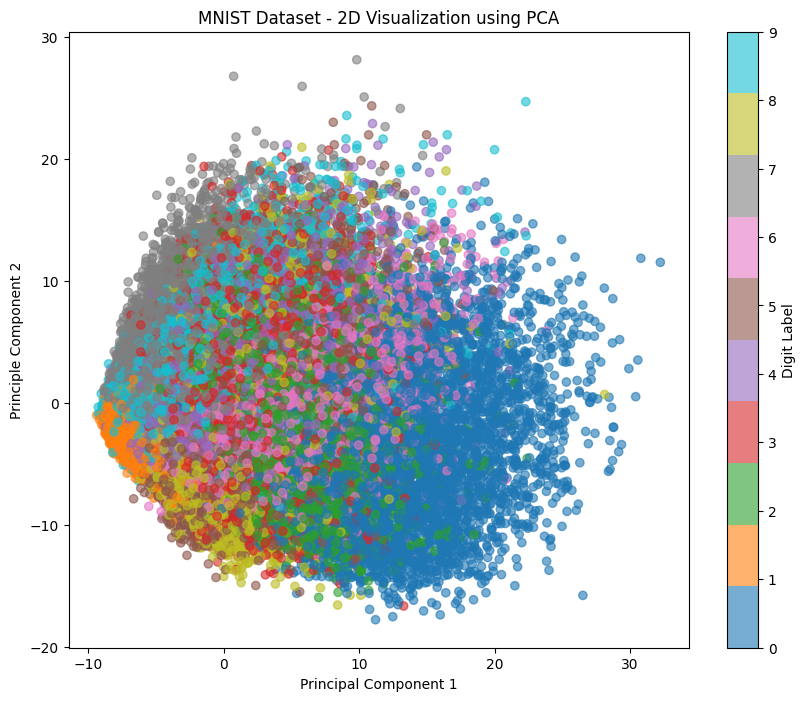

In [3]:
# for pca dimensionality redunction
train_images = train_images.reshape(train_images.shape[0], -1)

scaler = StandardScaler()
train_images_scaled = scaler.fit_transform(train_images)

pca = PCA(n_components=2)
train_images_pca = pca.fit_transform(train_images_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(train_images_pca[:, 0], train_images_pca[:, 1], c=train_labels, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, label="Digit Label")
plt.title("MNIST Dataset - 2D Visualization using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principle Component 2")
plt.show()

In [4]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')/255

train_images_flat = train_images.reshape((60000, -1)).astype('float32') / 255
print(train_images_flat.shape)


(60000, 784)


In [5]:
subset_size = 5000  # Adjust for computational feasibility
train_images_subset = train_images_flat[:subset_size]
train_labels_subset = train_labels[:subset_size]

# Apply t-SNE to the subset
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
train_tsne = tsne.fit_transform(train_images_subset)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


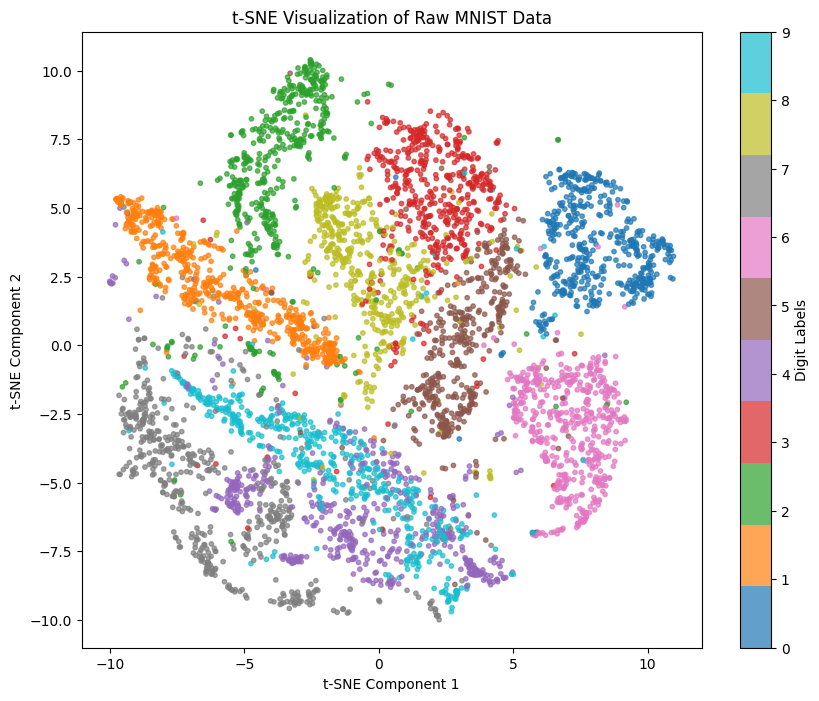

In [6]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(train_tsne[:, 0], train_tsne[:, 1], c=train_labels_subset, cmap='tab10', s=10, alpha=0.7)
plt.colorbar(scatter, label='Digit Labels')
plt.title('t-SNE Visualization of Raw MNIST Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [7]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [8]:
# we instantiate the Sequential model
model = models.Sequential()

# the input is a 28x28x1
# the first conv layers will apply 32 filters of 3x3 scale, and
# the output as a 26x26x32
# then followed by a 2x2 Max Pooling which reduces the size of input
# this is because the neighboring pixels tend to have similar values
# we use a 2x2 scale which halves the 26x26 to 13x13
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.7637 - loss: 0.7084 - val_accuracy: 0.9763 - val_loss: 0.0769
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 87s 62ms/step - accuracy: 0.9630 - loss: 0.1266 - val_accuracy: 0.9847 - val_loss: 0.0512
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.9754 - loss: 0.0855 - val_accuracy: 0.9844 - val_loss: 0.0563
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.9818 - loss: 0.0681 - val_accuracy: 0.9890 - val_loss: 0.0433
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 53ms/step - accuracy: 0.9843 - loss: 0.0511 - val_accuracy: 0.9887 - val_loss: 0.0433
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 57ms/step - accuracy: 0.9857 - loss: 0.0489 - val_accuracy: 0.9890 - val_loss: 0.0426
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 54ms/step - accuracy: 0.9894 - loss: 0.0380 - val_accuracy: 0.9897 - val_loss: 0.0428
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.9903 - loss: 0.0322 - 

In [12]:
scores = model.evaluate(train_images, train_labels, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

Accuracy: 0.9957833290100098 
 Error: 0.42166709899902344


In [13]:
# Get predictions (class probabilities)
predictions = model.predict(test_images)  # Shape: (num_samples, num_classes)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [14]:
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)


In [15]:
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.99


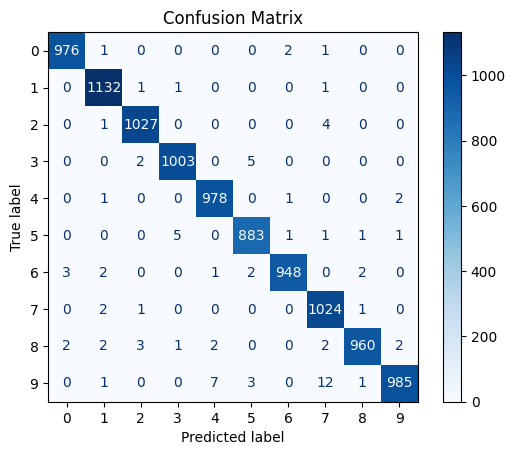

In [16]:
cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))

disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [17]:
# Generate and display classification report
report = classification_report(true_labels, predicted_labels, target_names=[f"Class {i}" for i in range(10)])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.99      1.00      1.00       980
     Class 1       0.99      1.00      0.99      1135
     Class 2       0.99      1.00      0.99      1032
     Class 3       0.99      0.99      0.99      1010
     Class 4       0.99      1.00      0.99       982
     Class 5       0.99      0.99      0.99       892
     Class 6       1.00      0.99      0.99       958
     Class 7       0.98      1.00      0.99      1028
     Class 8       0.99      0.99      0.99       974
     Class 9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



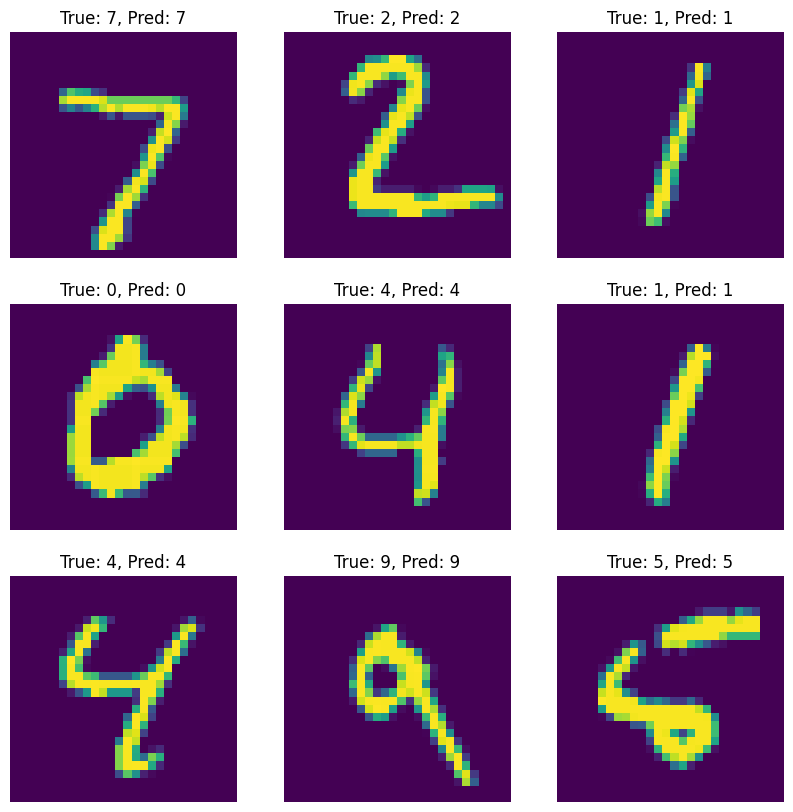

In [18]:
correct_indices = np.where(predicted_labels == true_labels)[0]
plt.figure(figsize=(10, 10))
for i, idx in enumerate(correct_indices[:9]):  # Show first 9 correct predictions
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[idx].reshape(28, 28, 1))  # Adjust for CIFAR-10 shape
    plt.title(f"True: {true_labels[idx]}, Pred: {predicted_labels[idx]}")
    plt.axis('off')
plt.show()

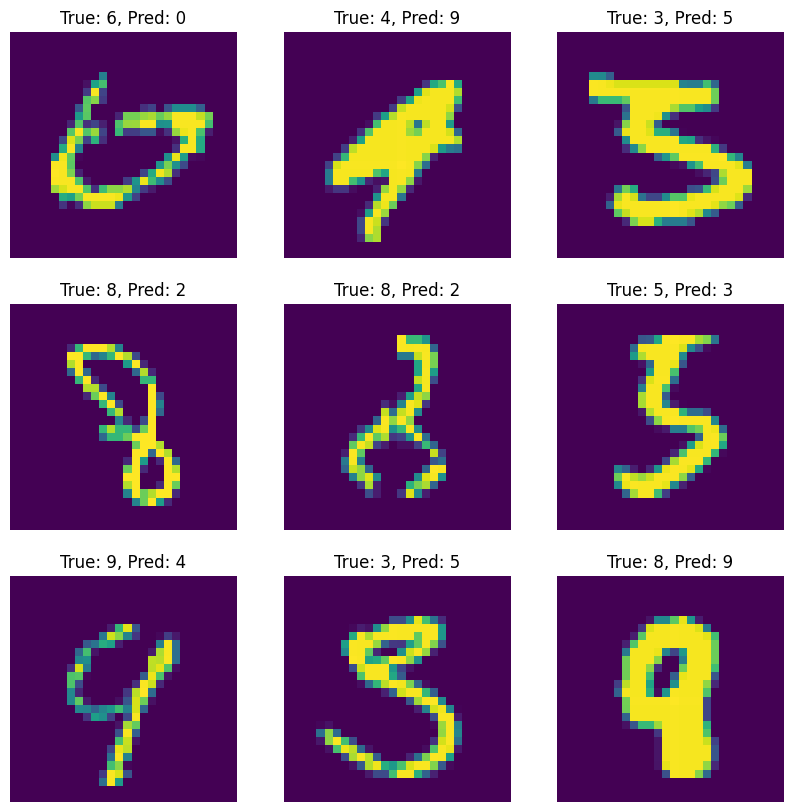

In [19]:
incorrect_indices = np.where(predicted_labels != true_labels)[0]
plt.figure(figsize=(10, 10))
for i, idx in enumerate(incorrect_indices[:9]):  # Show first 9 incorrect predictions
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[idx].reshape(28, 28, 1))  # Adjust for CIFAR-10 shape
    plt.title(f"True: {true_labels[idx]}, Pred: {predicted_labels[idx]}")
    plt.axis('off')
plt.show()

In [20]:
from tensorflow.keras.metrics import top_k_categorical_accuracy
# Define a top-k metric
def top_k_accuracy(y_true, y_pred, k=3):
    return top_k_categorical_accuracy(y_true, y_pred, k=k).numpy().mean()

# Calculate top-3 accuracy
top3_acc = top_k_accuracy(test_labels, predictions, k=3)
print(f"Top-3 Accuracy: {top3_acc:.2f}")

Top-3 Accuracy: 1.00


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


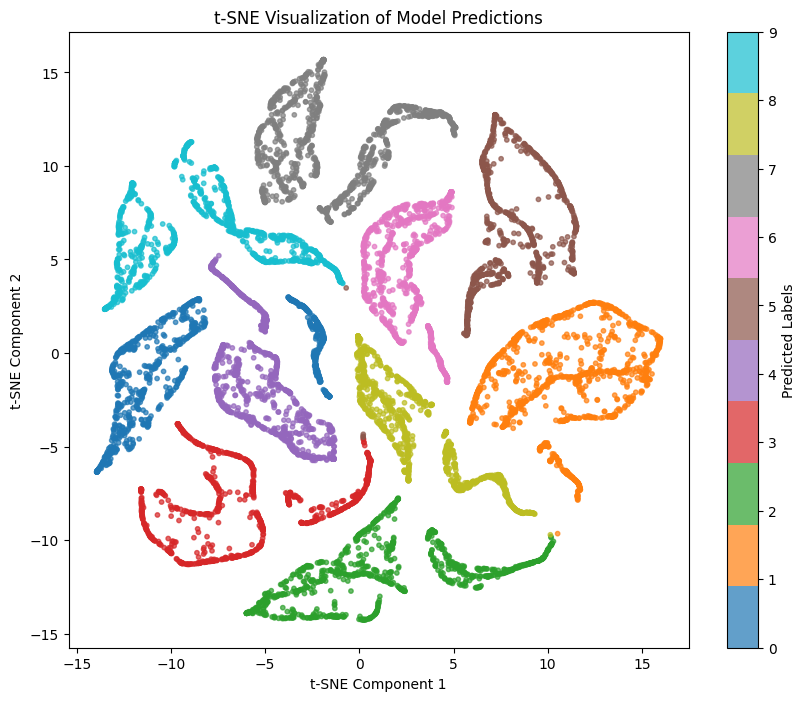

In [21]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
test_tsne = tsne.fit_transform(predictions)

# Get the actual labels or predicted labels for coloring
predicted_labels = np.argmax(predictions, axis=1)

# Visualize the t-SNE embedding
plt.figure(figsize=(10, 8))
scatter = plt.scatter(test_tsne[:, 0], test_tsne[:, 1], c=predicted_labels, cmap='tab10', s=10, alpha=0.7)
plt.colorbar(scatter, label='Predicted Labels')
plt.title('t-SNE Visualization of Model Predictions')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

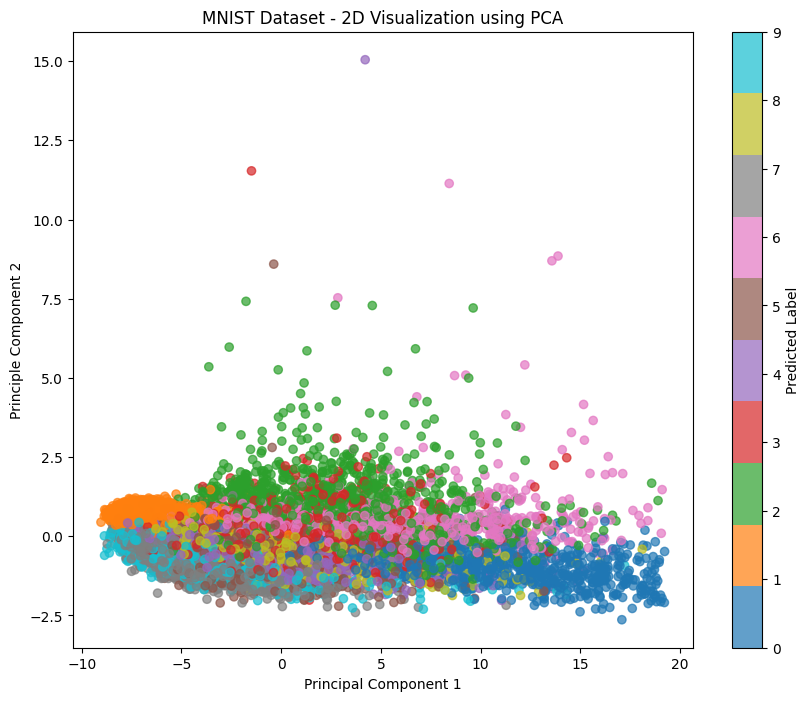

In [ ]:
# pca for the prediction
train_images = train_images.reshape(train_images.shape[0], -1)
test_images = test_images.reshape(test_images.shape[0], -1)
# Compute Z-scores for the PCA-transformed data

scaler = StandardScaler()
train_images_scaled = scaler.fit_transform(train_images)
test_images_scaled = scaler.transform(test_images)

pca = PCA(n_components=2)
test_images_pca = pca.fit_transform(test_images_scaled)

z_scores = zscore(test_images_pca, axis=0)

threshold = 3
mask = (abs(z_scores) < threshold).all(axis=1)

# Filter the data and labels
test_images_pca_filtered = test_images_pca[mask]
predicted_labels_filtered = np.array(predicted_labels)[mask]

plt.figure(figsize=(10, 8))
scatter = plt.scatter(test_images_pca_filtered[:, 0], test_images_pca_filtered[:, 1], c=predicted_labels_filtered, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, label="Predicted Label")
plt.title("MNIST Dataset - 2D Visualization using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principle Component 2")
plt.show()

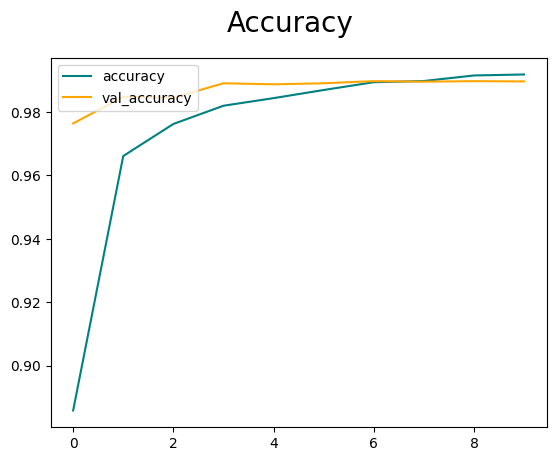

In [22]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

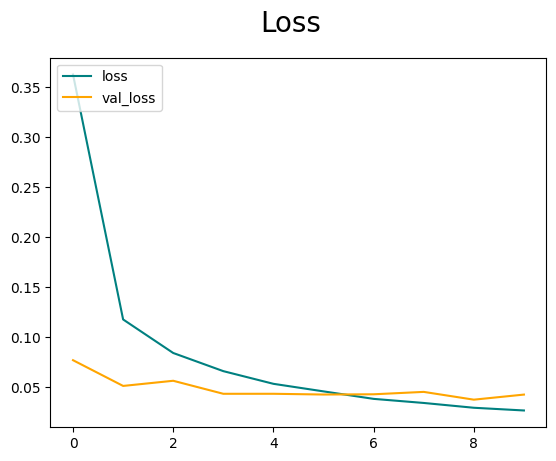

In [23]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()